<a href="https://colab.research.google.com/github/expectnothin/asrkr-ml-py/blob/main/TollywoodMoviesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7964285714285714


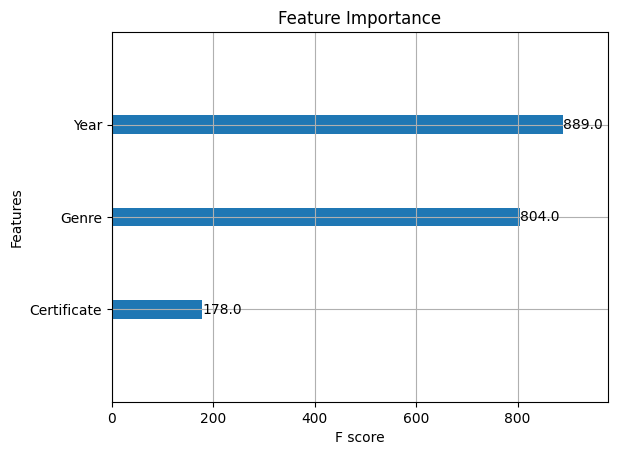

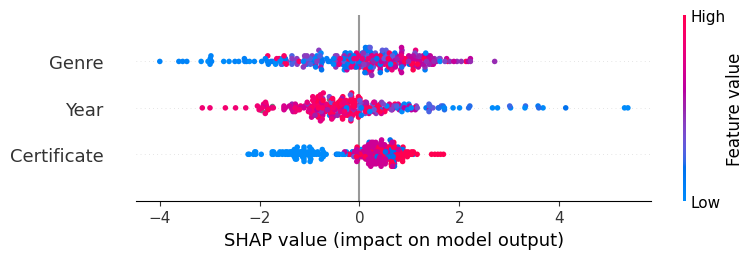

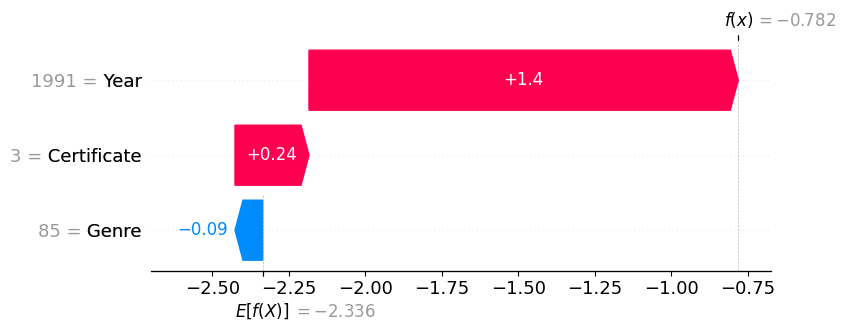

Prediction: Flop 😬
['Unnamed: 0', 'Movie', 'Year', 'Certificate', 'Genre', 'Overview', 'Runtime', 'Rating', 'No.of.Ratings']


In [23]:
from datasets import load_dataset
import pandas as pd

df = pd.read_csv("hf://datasets/rohitvaddepalli/TeluguMovies/TeluguMovies_dataset.csv")



df['Certificate'] = df['Certificate'].astype('category').cat.codes
df['Genre'] = df['Genre'].astype('category').cat.codes
X = df[['Certificate', 'Genre', 'Year']]
y = df['Rating'].apply(lambda x: 1 if x >= 7.5 else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb

model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()


import shap

# Create SHAP explainer and get values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Explain one specific row (say row index 5)
shap.plots.waterfall(shap_values[5])


# Get the encodings used during training
cert_map = dict(zip(df['Certificate'].astype('category').cat.categories, df['Certificate'].astype('category').cat.codes))
genre_map = dict(zip(df['Genre'].astype('category').cat.categories, df['Genre'].astype('category').cat.codes))

# Your new movie input
new_movie = {
    'Certificate': 'U/A',
    'Genre': 'Action',
    'Year': 2025
}

# Encode based on training mappings
cert_val = cert_map.get(new_movie['Certificate'], 0)  # Default to 0 if not found
genre_val = genre_map.get(new_movie['Genre'], 0)

# Build the input for prediction
X_new = pd.DataFrame([{
    'Certificate': cert_val,
    'Genre': genre_val,
    'Year': new_movie['Year']
}])

# Make the prediction
pred = model.predict(X_new)

# Output result
print("Prediction:", "Hit 🎯" if pred[0] == 1 else "Flop 😬")

print(df.columns.tolist())



